In [31]:
# First, you need to install shap module for the TreeExplained model
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from google.colab import drive, files
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import shap
import pickle


In [3]:
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


# Load required files

In [ ]:
# you can change the path of the directory based on where you saved the repo.
dataset_dir = '/content/drive/My Drive/peak/dataset_dir'
pickle_dir = '/content/drive/My Drive/peak/pickle_dir'


In [ ]:
df_train = pd.read_csv(dataset_dir +"/df_train.csv")
df_test = pd.read_csv(dataset_dir +"/df_test.csv")

train_input = pickle.load(open(pickle_dir+"/train_input.pickle", "rb"))
test_input = pickle.load(open(pickle_dir+"/test_input.pickle", "rb"))
train_label = pickle.load(open(pickle_dir+"/train_label.pickle", "rb"))
test_label = pickle.load(open(pickle_dir+"/test_label.pickle", "rb"))


# Train a model using the Random Forest algorithm

In [6]:
# You can specify your own seed and depth of the algorithm
random_state, max_depth = 333, 13
classifier_rf = RandomForestClassifier(random_state = random_state, max_depth=max_depth)
classifier_rf_fit = classifier_rf.fit(train_input, train_label)
classifier_rf_pred = classifier_rf_fit.predict(test_input)


# Performance

In [7]:
print('Random Forest Accuracy (Train): ', metrics.accuracy_score(classifier_rf_fit.predict(train_input), train_label)) 
print('Random Forest Accuracy (Test): ', metrics.accuracy_score(classifier_rf_pred, test_label)) 


Random Forest Accuracy (Train):  0.8939259259259259
Random Forest Accuracy (Test):  0.884


# Show the contributions of each topics using the TreeExplainer model

In [11]:
topics = 20
my_list = [str(i) for i in np.arange(topics)]
input_columns = list(map(lambda orig_string: 'topic ' + orig_string, my_list))

train_df_input = pd.DataFrame(train_input, columns = input_columns)
train_df_label = pd.DataFrame(train_label, columns = ['label'])
len(train_df_input), len(train_df_label)

test_df_input = pd.DataFrame(test_input, columns = input_columns)
test_df_label = pd.DataFrame(test_label, columns = ['label'])


In [28]:
def show_topics_contributions(image_idx, demo_df):
    # Train a Random Forest model
    random_state, max_depth = 333, 13
    classifier_rf = RandomForestClassifier(random_state = random_state, max_depth=max_depth)
    classifier_rf_fit = classifier_rf.fit(train_input, train_label)
    
    # Train a TreeExplainer model for the binary (public/private) classification
    explainer = shap.TreeExplainer(classifier_rf_fit)
    sv = explainer(test_df_input.iloc[[demo_df[image_idx]],:])

    if (test_df_label.iloc[[demo_df[image_idx]],:].values == 0):
        exp = shap.Explanation(sv.values[:,:,0], 
                        sv.base_values[:,0], 
                        data=test_df_input.iloc[[demo_df[image_idx]],:].values, 
                        feature_names=test_df_input.columns)
    else:
        exp = shap.Explanation(sv.values[:,:,1], 
                        sv.base_values[:,1], 
                        data=test_df_input.iloc[[demo_df[image_idx]],:].values, 
                        feature_names=test_df_input.columns)

    return shap.plots.waterfall(exp[0])


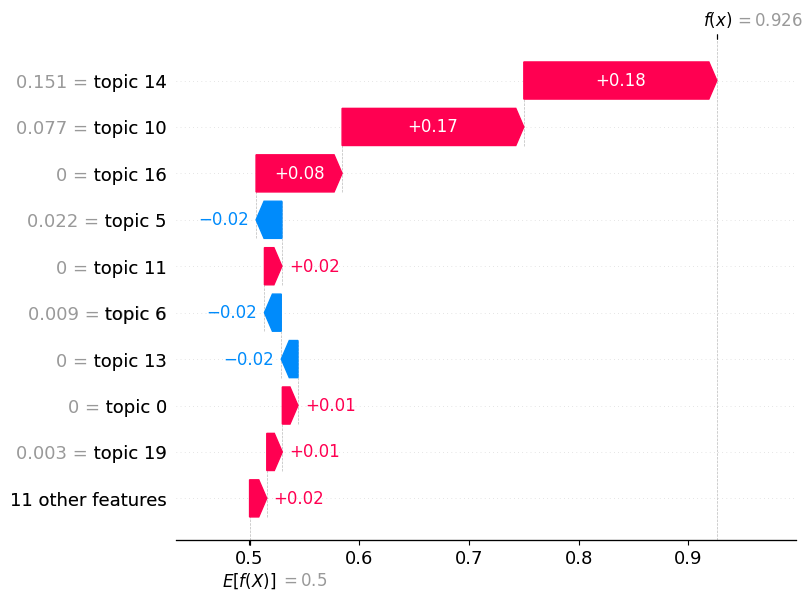

In [30]:
# You can change an index of image and dataframe (i.e., Train or Test)

image_idx = 0
show_topics_contributions(image_idx, list(df_test.index))
